In [56]:
#Importy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, classification_report, f1_score, precision_score, roc_auc_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn import datasets, metrics, model_selection, svm
from sklearn.metrics import r2_score
import math


Blabla wstęp

In [57]:
#Wczytywanie danych
df = pd.read_csv('data/pokemon.csv')
df = df.drop(['type2', 'percentage_male', 'height_m'], axis=1)
df['weight_kg'].fillna(df['weight_kg'].mean(), inplace=True)
pd.set_option('display.max_columns', None)
df[df['name'] == 'Pikachu']

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,capture_rate,classfication,defense,experience_growth,hp,japanese_name,name,pokedex_number,sp_attack,sp_defense,speed,type1,weight_kg,generation,is_legendary
24,"['Static', 'Lightningrod']",1.0,1.0,1.0,0.5,1.0,1.0,1.0,0.5,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0,55,2560,70,320,190,Mouse Pokémon,40,1000000,35,Pikachuピカチュウ,Pikachu,25,50,50,90,electric,6.0,1,0


In [58]:
#Wpływ wagi pokemona na różne jego cechy - tworzenie dataframeów
df1 = df[['name','attack', 'hp']]
df2_speed = df[['name', 'speed']]
df3_multi = df[['name', 'base_total','speed', 'defense', 'attack', 'sp_attack', 'sp_defense', 'hp']]
df3_multi['all'] = df['base_total'] + df['attack'] + df['defense'] + df['base_happiness'] + df['hp'] + df['speed'] + df['sp_attack'] + df['sp_defense']


C:\Users\48795\AppData\Local\Temp\ipykernel_68104\2044311762.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3_multi['all'] = df['base_total'] + df['attack'] + df['defense'] + df['base_happiness'] + df['hp'] + df['speed'] + df['sp_attack'] + df['sp_defense']


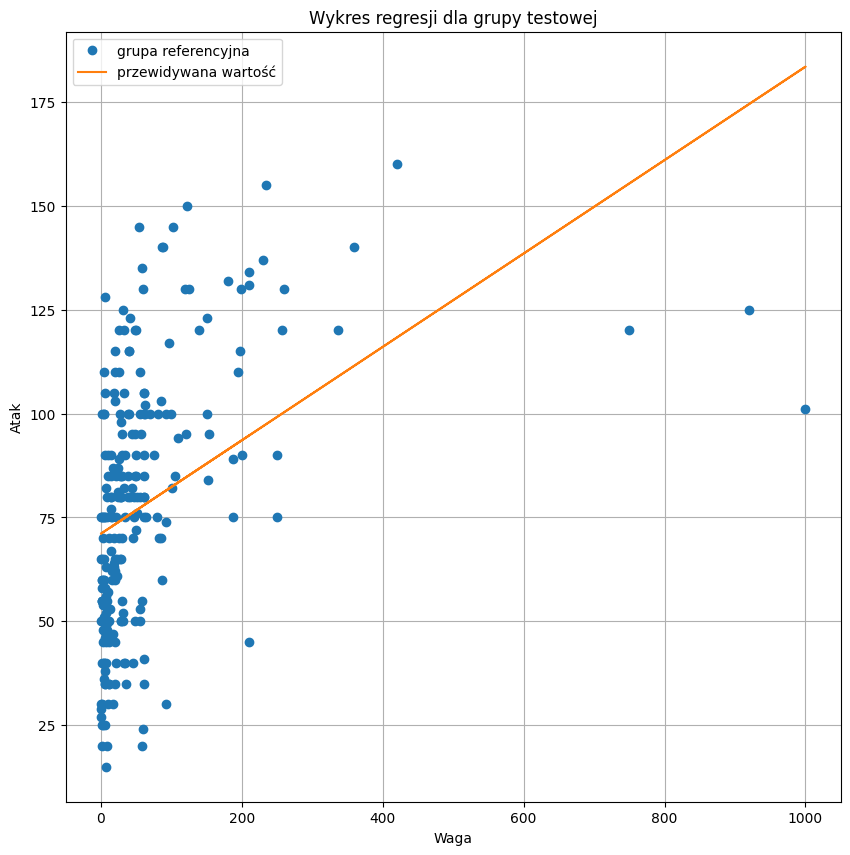

In [59]:
#Wytrenowanie i test modelu
train_x, test_x, train_y, test_y = train_test_split(df['weight_kg'],df1['attack'], test_size=0.3)
train_x = train_x.to_numpy().reshape(-1,1)
train_y = train_y.to_numpy().reshape(-1,1)
model = LinearRegression()
model.fit(train_x, train_y)
b = model.intercept_[0]
a = model.coef_[0][0]
def linear_reg(a,b,x):
    return a*x + b
y_pred = linear_reg(a,b,test_x)
fig = plt.figure(figsize=(10,10))
plt.plot(test_x,test_y,marker='o', linestyle='none')
plt.plot(test_x,y_pred)
plt.grid()
plt.legend(["grupa referencyjna", "przewidywana wartość"])
plt.xlabel('Waga')
plt.ylabel("Atak")
plt.title("Wykres regresji dla grupy testowej")
plt.show()


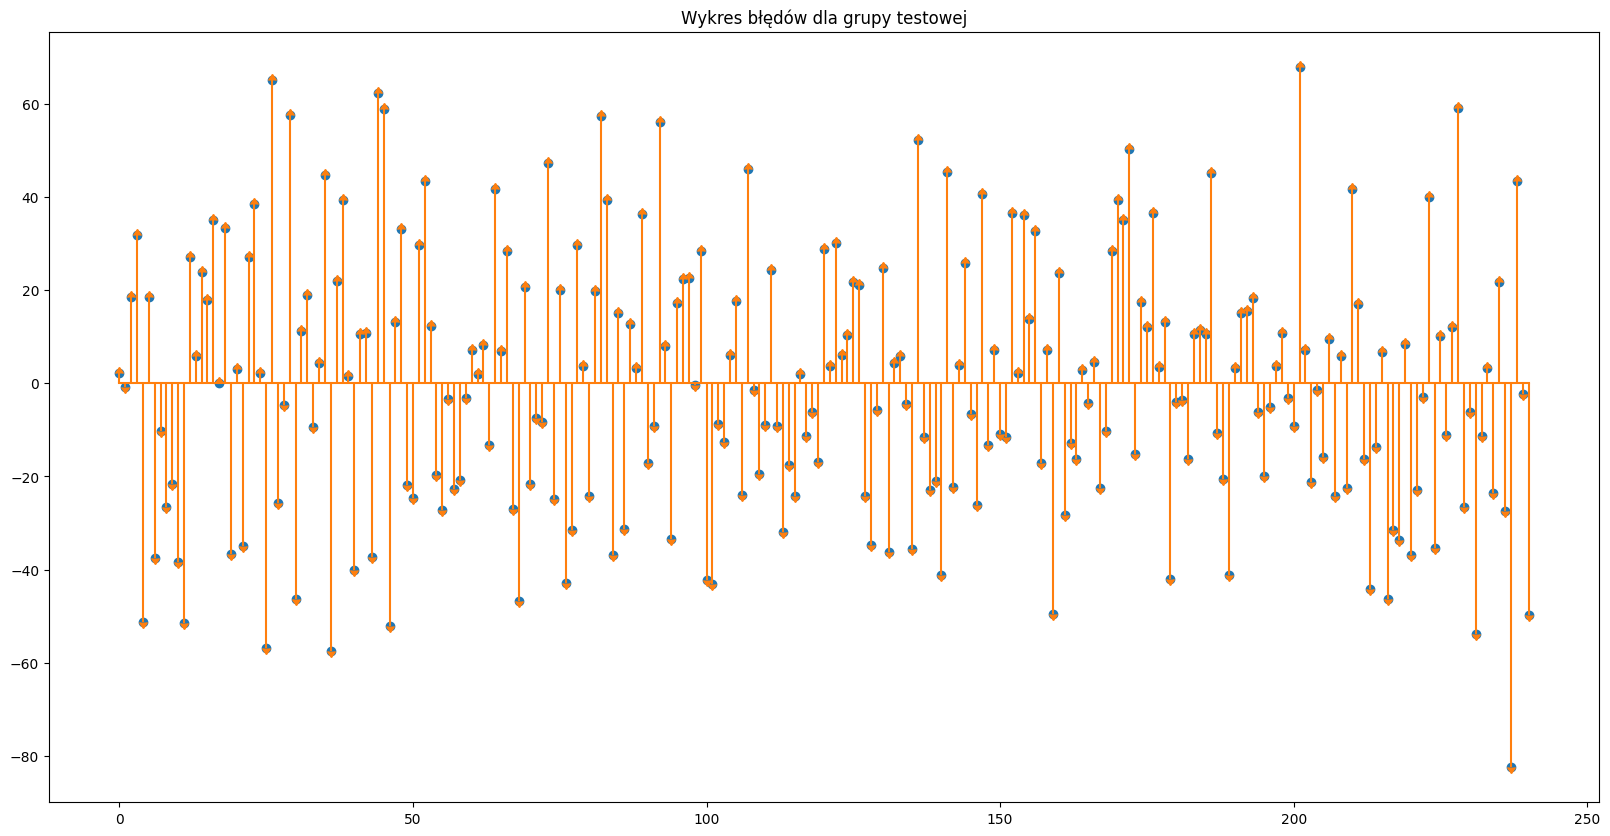

In [75]:
#Wykres błędów dla grupy testowej
fig = plt.figure(figsize=(20,10))
y_error = test_y - y_pred
y_error = y_error.to_numpy().reshape(-1)
y_error
lolims = np.greater(y_error, 0)
uplims = np.less(y_error, 0)
x = np.arange(0, len(y_error))
h = [0]*len(y_error)
plt.plot(y_error, linestyle='none', marker='o')
plt.errorbar(x,h, yerr = np.abs(y_error), label = 'both limits (default)', lolims=lolims, uplims=uplims)
plt.title("Wykres błędów dla grupy testowej");

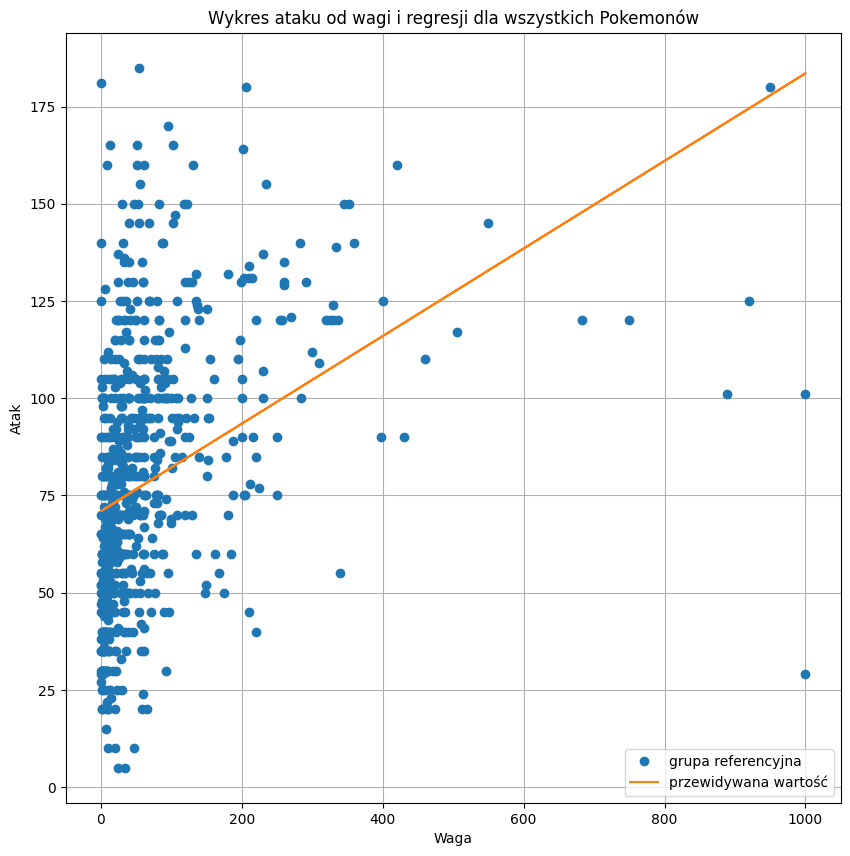

In [61]:
#Wykres regresji liniowej ataku od wagi dla wszystkich pokemonów
y, x = df1['attack'], df['weight_kg']
x = x.to_numpy().reshape(-1,1)
y = y.to_numpy().reshape(-1,1)
model.fit(x, y)
b = model.intercept_[0]
a = model.coef_[0][0]
y_pred_all = linear_reg(a,b,x)
fig = plt.figure(figsize=(10,10))
plt.plot(x,y,marker='o', linestyle='none')
plt.plot(x,y_pred_all)
plt.grid()
plt.legend(["grupa referencyjna", "przewidywana wartość"])
plt.xlabel('Waga')
plt.ylabel("Atak")
plt.title("Wykres ataku od wagi i regresji dla wszystkich Pokemonów")
plt.show()

##### Uwaga
Ten megaciężki pokemon z małym atakiem to Cosmoem: https://pokemon.fandom.com/wiki/Cosmoem
Ma wysokość tylko 10cm i waży tonę

<ErrorbarContainer object of 3 artists>

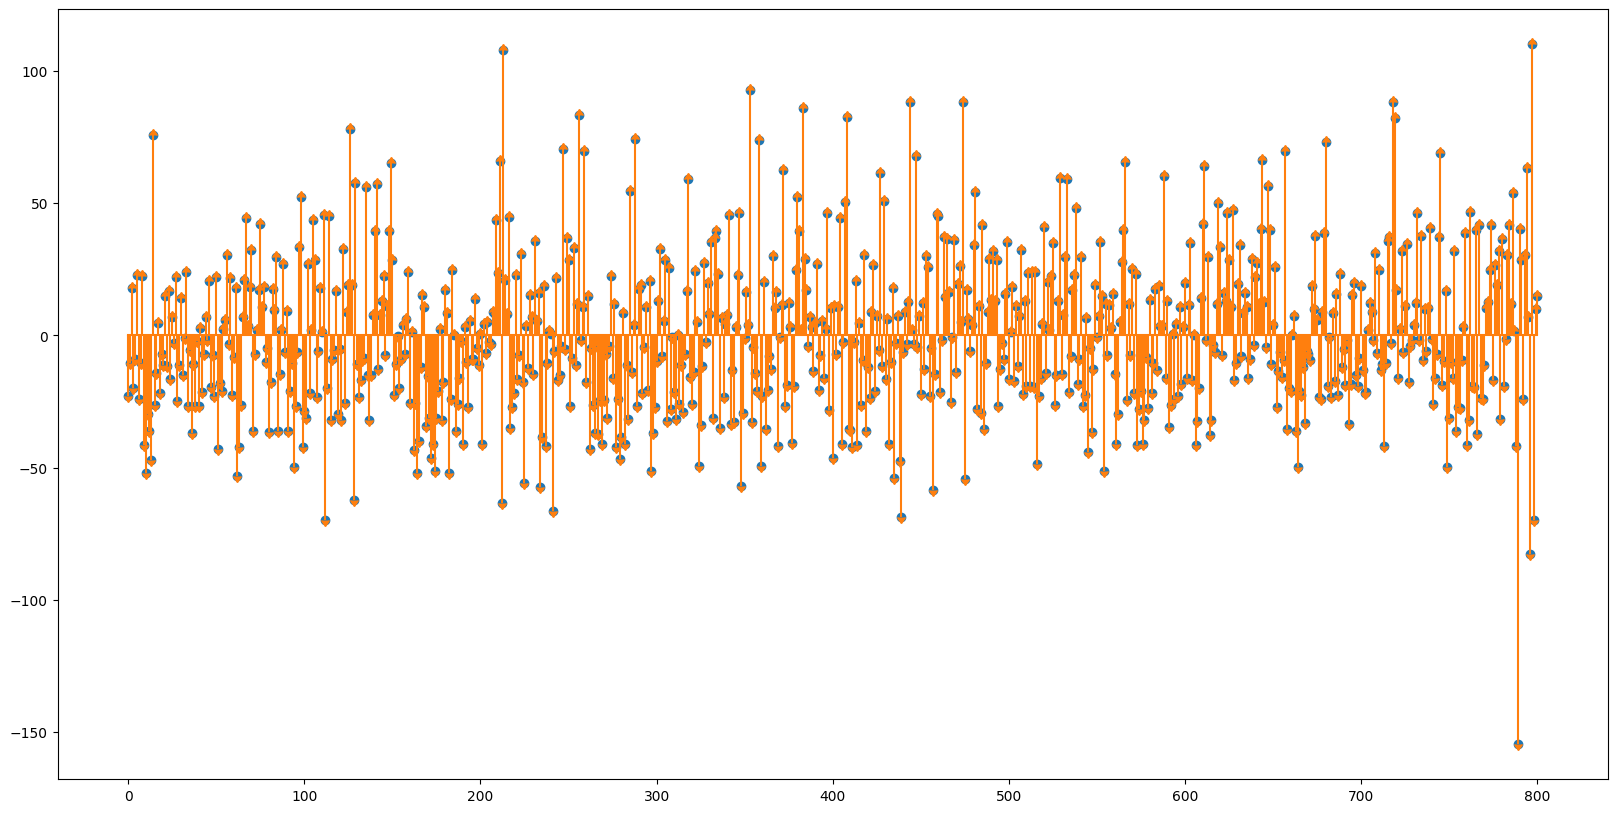

In [62]:
#Wykres błędów dla wszystkich pokemonów
fig = plt.figure(figsize=(20,10))
y_error_all = y - y_pred_all
y_error_all = y_error_all.reshape(-1)
y_error_all
lolims = np.greater(y_error_all, 0)
uplims = np.less(y_error_all, 0)
x = np.arange(0, len(y_error_all))
h = [0]*len(y_error_all)
plt.plot(y_error_all, linestyle='none', marker='o')
plt.errorbar(x,h, yerr = np.abs(y_error_all), label = 'both limits (default)', lolims=lolims, uplims=uplims)

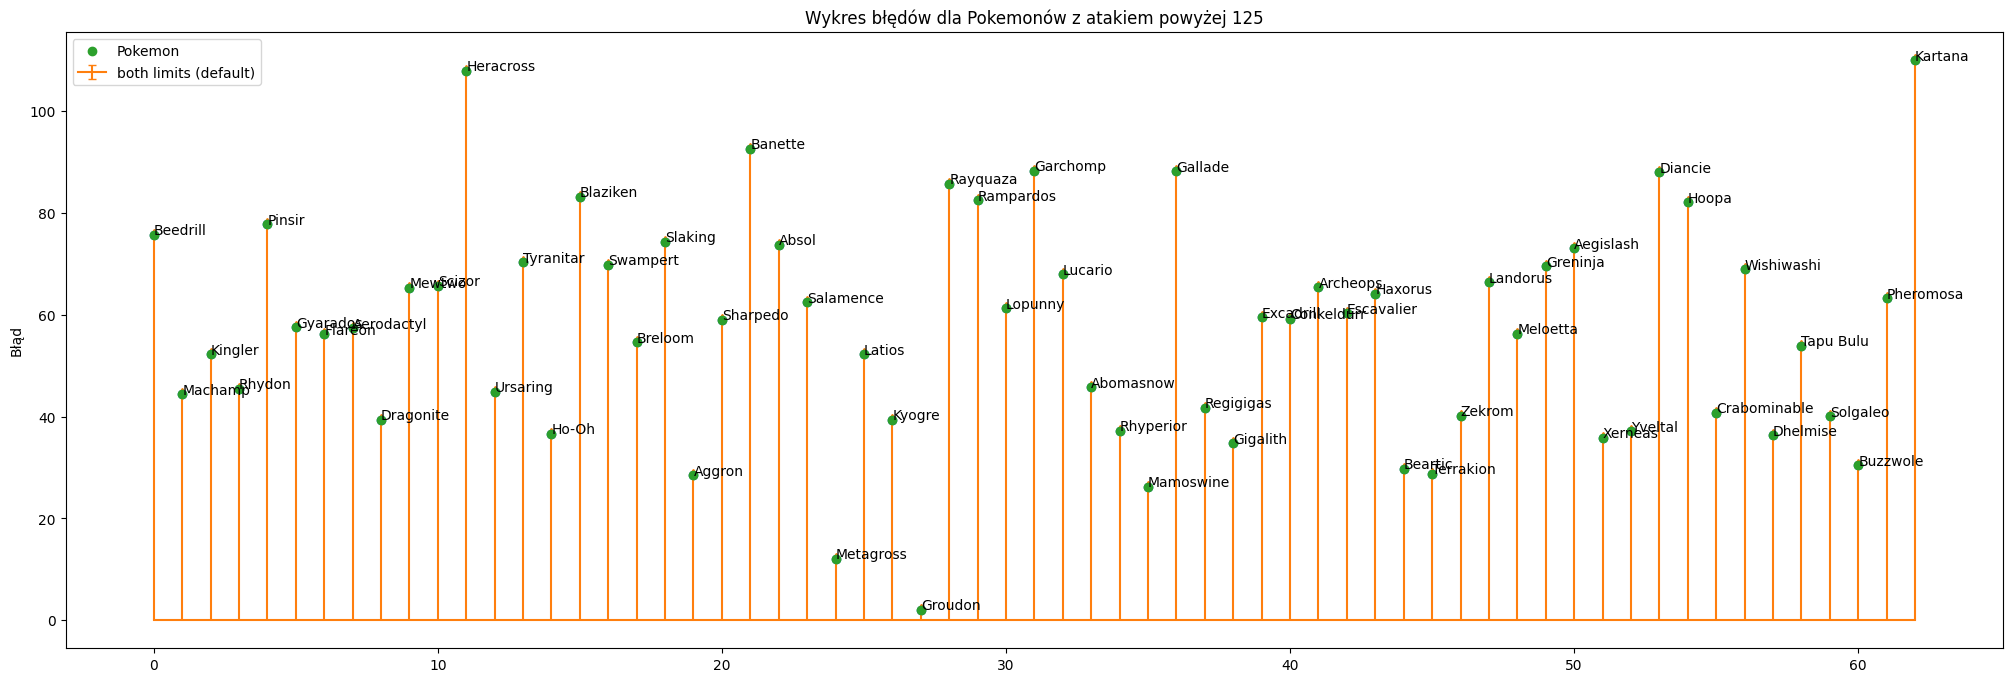

In [63]:
#Wykres błędów dla pokemonów z największym atakiem
y_best = df1['attack'][df['attack'] > 125]
x_best = df['weight_kg'][df['attack'] > 125]
x_best = x_best.to_numpy().reshape(-1,1)
y_best = y_best.to_numpy().reshape(-1,1)
y, x = df1['attack'], df['weight_kg']
x = x.to_numpy().reshape(-1,1)
y = y.to_numpy().reshape(-1,1)
model.fit(x, y)
b = model.intercept_[0]
a = model.coef_[0][0]
y_pred_best = linear_reg(a,b,x_best)
y_names_attack = df1['name'][df['attack'] > 125]
y_names_attack.to_numpy()
fig = plt.figure(figsize=(25,8))
y_error_best = y_best - y_pred_best
y_error_best = y_error_best.reshape(-1)
y_error_best
lolims = np.greater(y_error_best, 0)
uplims = np.less(y_error_best, 0)
x = np.arange(0, len(y_error_best))
h = [0]*len(y_error_best)
plt.plot(y_error_best, linestyle='none', marker='o')
plt.errorbar(x,h, yerr = np.abs(y_error_best), label = 'both limits (default)', lolims=lolims, uplims=uplims)
plt.plot(y_error_best, linestyle='none', marker='o', label='Pokemon')

# Ustawienie etykiet dla punktów
i = 0
for name in y_names_attack:
    plt.annotate(f'{name}', xy = (i, y_error_best[i]))
    i += 1

plt.ylabel("Błąd")
plt.title("Wykres błędów dla Pokemonów z atakiem powyżej 125")
plt.legend()
plt.show() 


#### Wniosek

Wpływ ciężaru pokemona na jego atak jest pozytywny choć nie ma zbyt dużego wpływu. Ciężko znaleźć dużą korelację.

Patrząć na powstałe wykresy można wyróżnić kilka pokemonów jak Heracross czy Kartana okazują się jednak słabe w innych cechach. Warto zwrócić uwagę na Blzikena, Banette, Rayquaza, Garchomp, Gallade, Diancie oraz na Groudona.

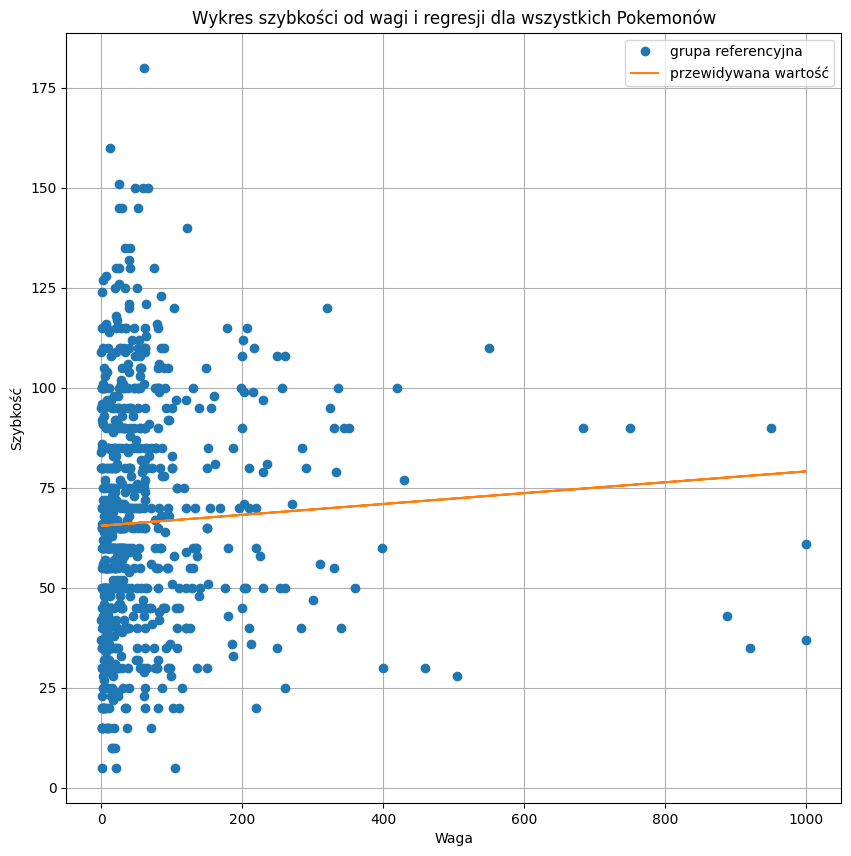

In [64]:
#Wykres szybkości od wagi i regresji dla wszystkich Pokemonów
y, x = df2_speed['speed'], df['weight_kg']
x = x.to_numpy().reshape(-1,1)
y = y.to_numpy().reshape(-1,1)
model.fit(x, y)
b = model.intercept_[0]
a = model.coef_[0][0]
y_pred_all = linear_reg(a,b,x)
fig = plt.figure(figsize=(10,10))
plt.plot(x,y,marker='o', linestyle='none')
plt.plot(x,y_pred_all)
plt.grid()
plt.legend(["grupa referencyjna", "przewidywana wartość"])
plt.xlabel('Waga')
plt.ylabel("Szybkość")
plt.title("Wykres szybkości od wagi i regresji dla wszystkich Pokemonów")
plt.show()

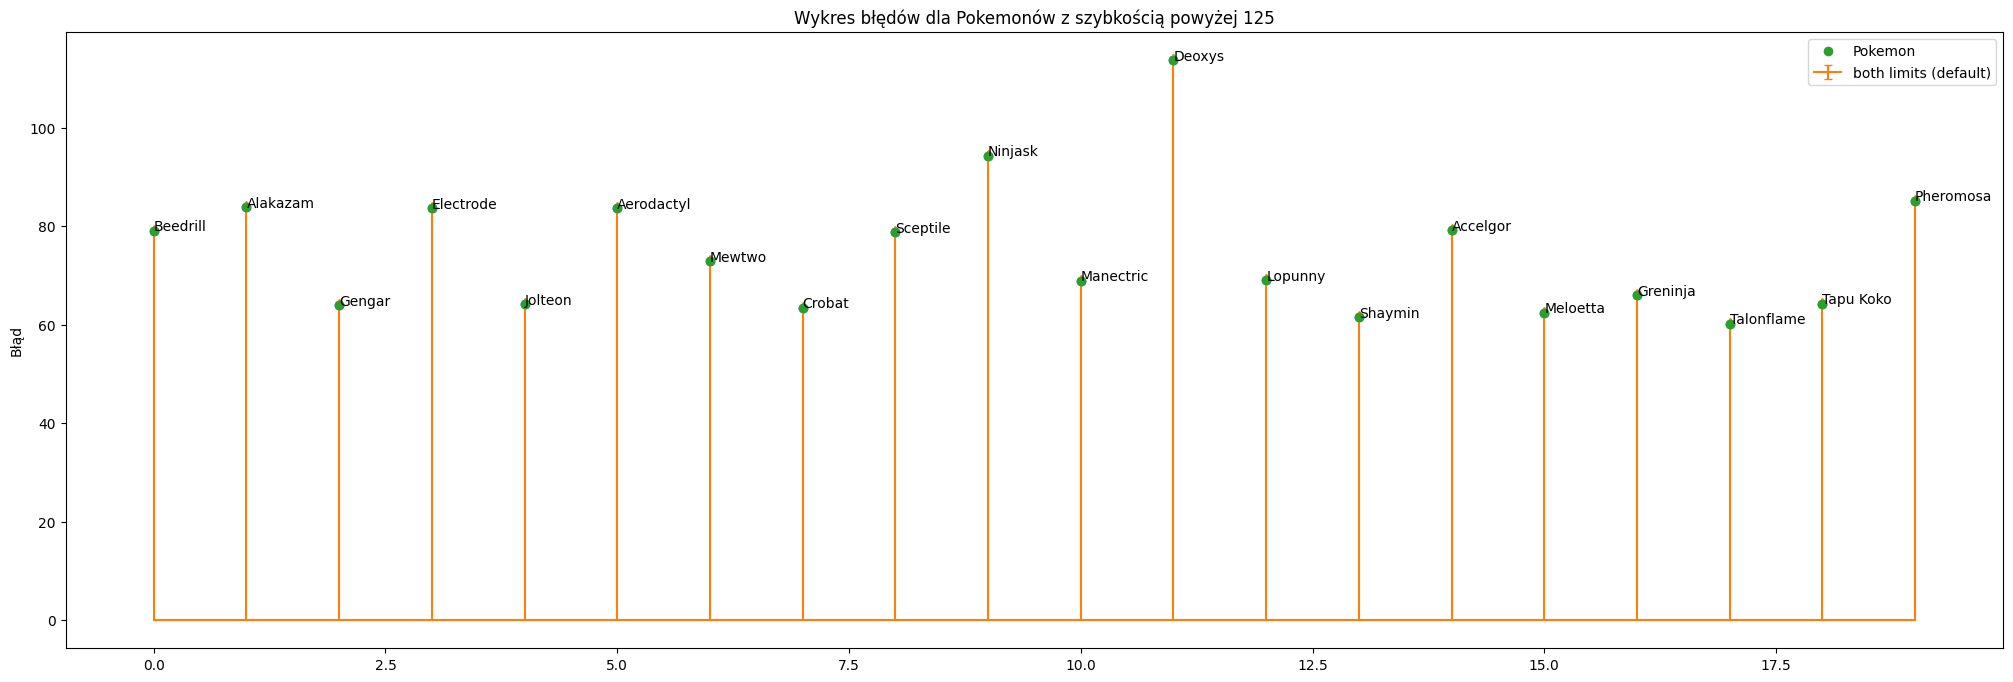

In [65]:
#Wykres błędów dla pokemonów z największą szybkością
y_speed = df2_speed['speed'][df['speed'] > 125]
x_speed = df['weight_kg'][df['speed'] > 125]
x_speed = x_speed.to_numpy().reshape(-1,1)
y_speed = y_speed.to_numpy().reshape(-1,1)
y, x = df2_speed['speed'], df['weight_kg']
x = x.to_numpy().reshape(-1,1)
y = y.to_numpy().reshape(-1,1)
model.fit(x, y)
b = model.intercept_[0]
a = model.coef_[0][0]
y_pred_speed = linear_reg(a,b,x_speed)
y_names_speed = df2_speed['name'][df['speed'] > 125]
y_names_speed.to_numpy()
fig = plt.figure(figsize=(25,8))
y_error_speed = y_speed - y_pred_speed
y_error_speed = y_error_speed.reshape(-1)
y_error_speed
lolims = np.greater(y_error_speed, 0)
uplims = np.less(y_error_speed, 0)
x = np.arange(0, len(y_error_speed))
h = [0]*len(y_error_speed)
plt.plot(y_error_speed, linestyle='none', marker='o')
plt.errorbar(x,h, yerr = np.abs(y_error_speed), label = 'both limits (default)', lolims=lolims, uplims=uplims)
plt.plot(y_error_speed, linestyle='none', marker='o', label='Pokemon')

# Ustawienie etykiet dla punktów
i = 0
for name in y_names_speed:
    plt.annotate(f'{name}', xy = (i, y_error_speed[i]))
    i += 1

plt.ylabel("Błąd")
plt.title("Wykres błędów dla Pokemonów z szybkością powyżej 125")
plt.legend()
plt.show() 


#### Wniosek
Tylko Mewtwo pojawił się na jednym i drugim wykresie

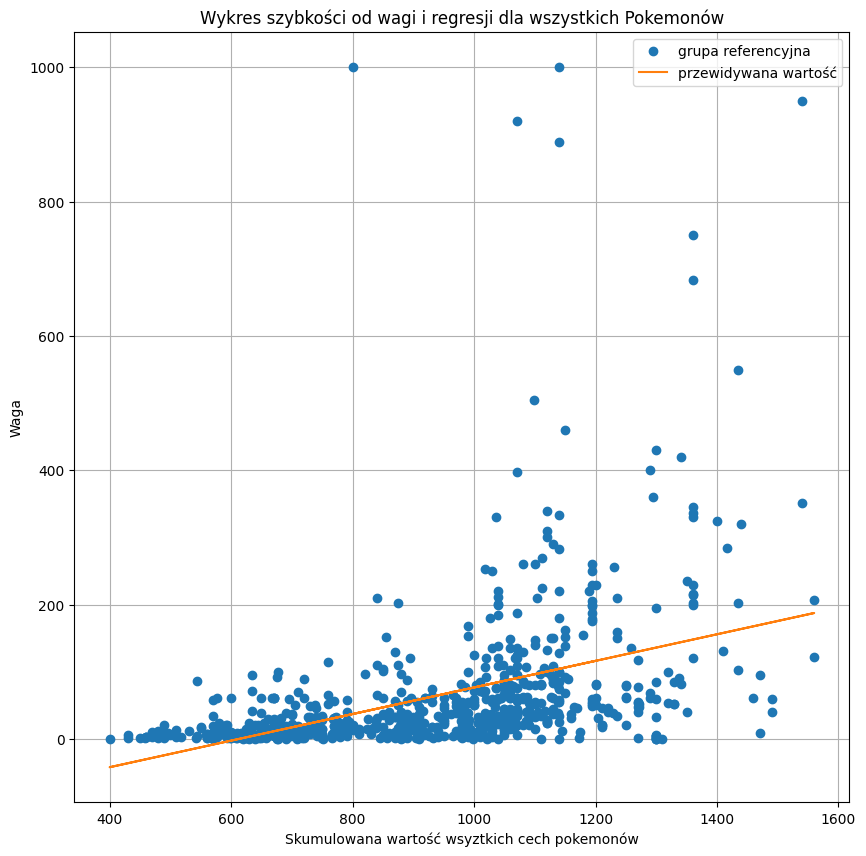

In [66]:
#Wykres regresji liniowej wielu cech od wagi dla wszystkich pokemonów
x = df3_multi['all']
y = df['weight_kg']
x = x.to_numpy().reshape(-1,1)
y = y.to_numpy().reshape(-1,1)
model.fit(x, y)
b = model.intercept_[0]
a = model.coef_[0][0]
y_pred_all = linear_reg(a,b,x)
#print('R2= ', r2_score(y,y_pred_all))
fig = plt.figure(figsize=(10,10))
plt.plot(x,y,marker='o', linestyle='none')
plt.plot(x,y_pred_all)
plt.grid()
plt.legend(["grupa referencyjna", "przewidywana wartość"])
plt.xlabel('Skumulowana wartość wsyztkich cech pokemonów')
plt.ylabel("Waga")
plt.title("Wykres szybkości od wagi i regresji dla wszystkich Pokemonów")
plt.show()

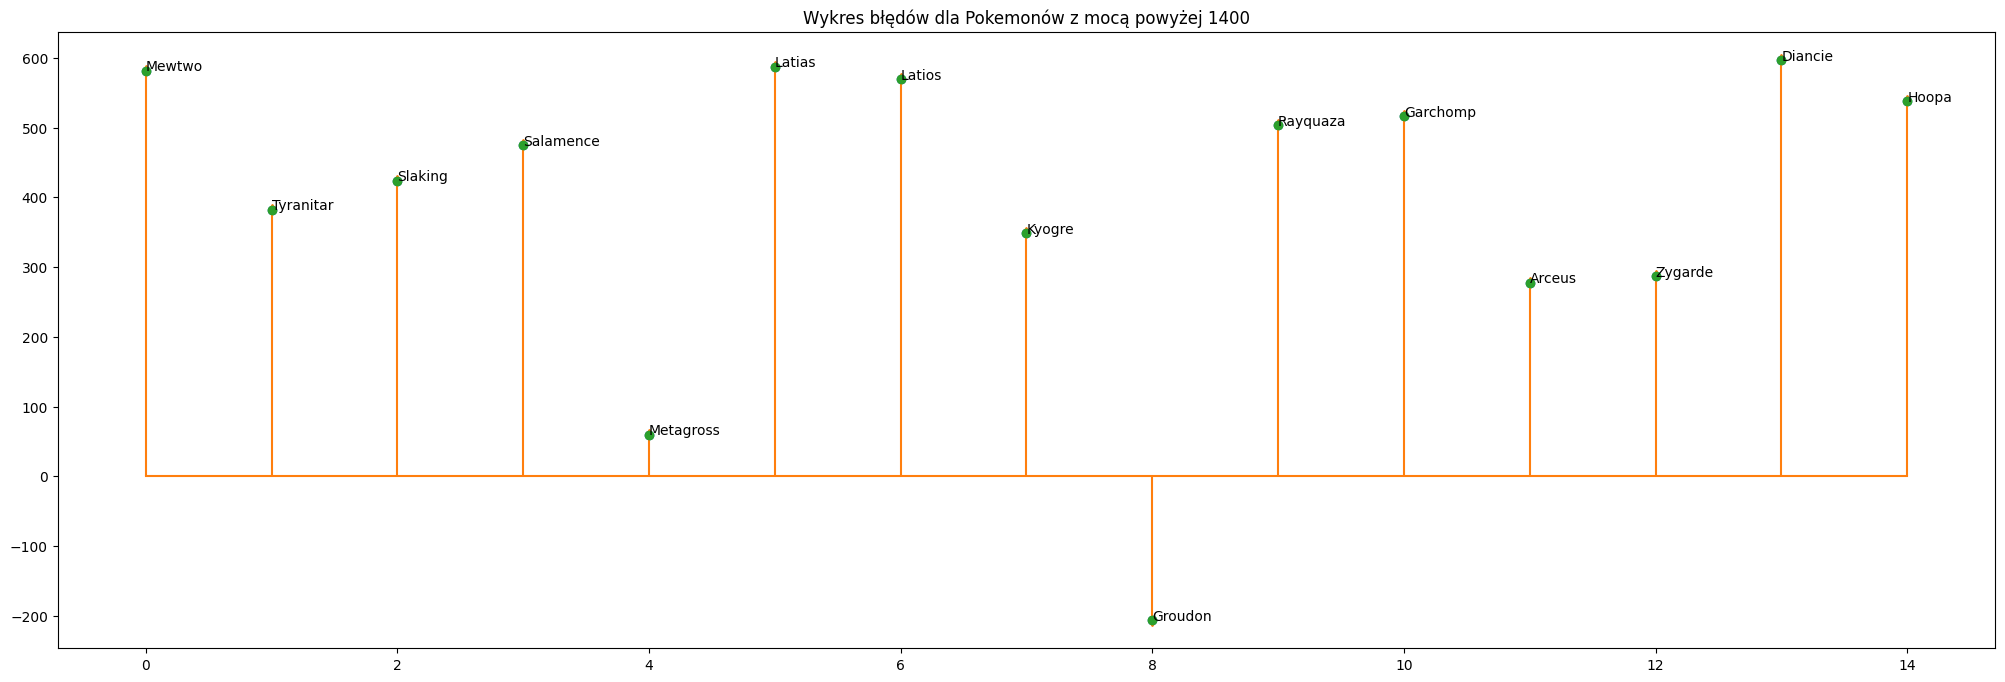

In [67]:
#Udowodnienie, że wszystkie najpotężniejsze pokemony są rzeczywiście najcięższe
y_all = df3_multi['all'][df3_multi['all'] > 1400]
x_all = df['weight_kg'][df3_multi['all'] > 1400]
x_all = x_all.to_numpy().reshape(-1,1)
y_all = y_all.to_numpy().reshape(-1,1)
y, x = df3_multi['all'], df['weight_kg']
x = x.to_numpy().reshape(-1,1)
y = y.to_numpy().reshape(-1,1)
model.fit(x, y)
b = model.intercept_[0]
a = model.coef_[0][0]
y_pred_all = linear_reg(a,b,x_all)
y_names_all = df3_multi['name'][df3_multi['all'] > 1400]
y_names_all.to_numpy()
fig = plt.figure(figsize=(25,8))
y_error_all = y_all - y_pred_all
y_error_all = y_error_all.reshape(-1)
y_error_all
lolims = np.greater(y_error_all, 0)
uplims = np.less(y_error_all, 0)
x = np.arange(0, len(y_error_all))
h = [0]*len(y_error_all)
plt.plot(y_error_all, linestyle='none', marker='o')
plt.errorbar(x,h, yerr = np.abs(y_error_all), label = 'both limits (default)', lolims=lolims, uplims=uplims)
plt.plot(y_error_all, linestyle='none', marker='o', label='Pokemon')

# Ustawienie etykiet dla punktów
i = 0
for name in y_names_all:
    plt.annotate(f'{name}', xy = (i, y_error_all[i]))
    i += 1

plt.title("Wykres błędów dla Pokemonów z mocą powyżej 1400")
plt.show() 

### Wnioski
Poszukiwanie najlepszego pokemona pod względem ich wagi nie było najlepszym pomysłem. 
Wyniki dla wszystkich cech włącznie z takimi, które wydawałyby się oczywiste jak punkty życia czy siła ataku nie mają dużej korelacji z wagą pokemona.
Takie pokemony jak Cosmoun pokazują jak bardzo wyjątkowe potrafią być.
Wszystkie wyniki wskazują zawsze te same pokemony, najlepsze cechy niezależnie od ich wagi posiadają legendarne pokemony takie jak Mewtwo, Rayquaza, Groudon, Kyogre, Garchomp, Diancie, Zygarde.
Jak się później okaże nasze zespoły będą składały się głównie z tych pokemonów.

,Winner,Lost,HP Winer,Factor,Missing Attack,Type Winer,Lost Type
0,Dartrix,Riolu,28.0,1.0,1,grass,fighting
1,Torterra,Meditite,90.0,1.0,0,grass,fighting
2,Heatran,Spewpa,86.0,1.0,1,fire,bug
3,Wobbuffet,Combee,165.0,0.5,1,psychic,bug
4,Machoke,Magikarp,75.0,0.5,0,fighting,water


,Lost Type,Lost
0,water,34692
1,steel,5929
2,rock,9068
3,psychic,15746
4,poison,10743
5,normal,25367
6,ice,6456
7,ground,5806
8,grass,25352
9,ghost,3582


In [76]:
df = pd.read_csv('gra/dane.csv')
df2 = df[['Lost', ' Lost Type']].groupby(by = ' Lost Type').count().sort_values(by=' Lost Type', ascending = False).reset_index(' Lost Type')
winners = df[['Winner', ' Type Winer']].groupby(' Type Winer').count().sort_values(by=' Type Winer', ascending = False).reset_index(' Type Winer')
df2['Winners'] = winners['Winner']
df2.rename(columns = {'Lost': 'Losers', ' Lost Type': 'Type'},  inplace = True)

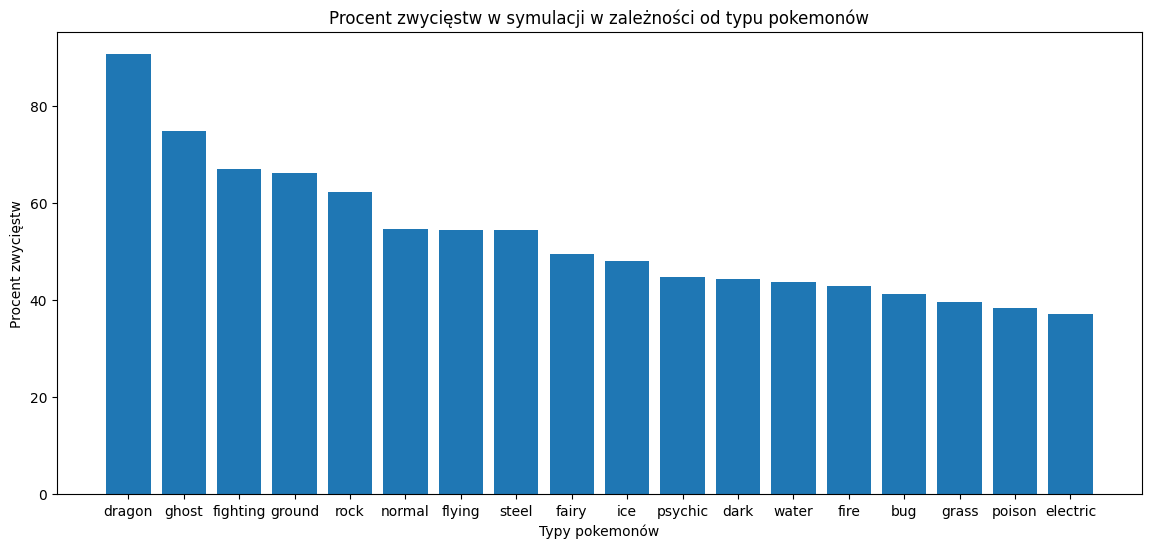

In [77]:
df2['Number_of_battles'] = df2['Winners'] +df2['Losers']
df2['Winning_ratio'] = np.round(df2['Winners']/df2['Number_of_battles']*100, 2)
cols = ['Type', 'Number_of_battles', 'Winners', 'Losers', 'Winning_ratio']
df2 = df2[cols]
df2.sort_values(['Winning_ratio'], ascending= False, inplace=True)
fig = plt.figure(figsize=(14,6))
plt.bar(x=df2['Type'], height = df2['Winning_ratio'])
plt.xlabel('Typy pokemonów')
plt.ylabel("Procent zwycięstw")
plt.title("Procent zwycięstw w symulacji w zależności od typu pokemonów");